In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import math
import seaborn as sns
import os
from collections import Counter
import sklearn
from sklearn.decomposition import PCA
from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn import cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
pd.set_option('display.max_columns', None)
from deep_translator import GoogleTranslator

In [29]:
df = pd.read_csv('Pull_Data.csv', encoding='utf-8')
df

,rest name,rest add,rest open,rest type,rest rank,reviews num,Food rank,Service rank,atmosphere rank,price rank,None,Bar restaurant,Country restaurant,Shabbat observant business,Kosher restaurant,A strictly kosher restaurant,Possibility of sitting outside,A restaurant with regulated parking,Accessibility for the disabled,Take Away,Catering services,Access to public transportation,Tutorials/workshops,Location for photography,Events up to 100 people,"Sukkot, Tabernacles",Boutique events,Small events,Bar/Bat Mitzvah,alliance,weddings,Team building days,birthdays,fun days,wedding anniversaries,Seminars,meetings,conventions,Company parties,press conferences,Department Arabs,Exhibitions,Events up to 50 people,Family day,Restaurant for events and conferences,A place for events,Open on Friday,Open on Sundays,live shows,private room,"Arrangements for businesses, institutions and factories",Shipments,Outdoor garden,conference rooms,Projector and screen,amplification equipment,Table reservation service,Open on Passover,Bachelor/bachelorette parties,cocktail,Restaurant with free parking
0,"חצר עין כרם, עין כרם מדרגות הרומאים, ירושלים",ירושלים,א'-ה' 14:00-23:00\r\nו' 09:30-14:00,מסעדה חלבית,5.0,2,5.0,5.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"זוקו - zoko by izidor segal, קריית אונו","שד' קק""ל 5, קריית אונו",א'-ה' 18:30-00:00,מסעדת בשרים,5.0,3,5.0,5.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"הלובי, בני ברק","לח""י 31, בני ברק",א'-ה' 08:30-17:00,מסעדה ים תיכונית,5.0,2,5.0,5.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"החשמונאים 7, בני ברק","החשמונאים 7, בני ברק",א'-ד' 14:00-23:00\r\nה' 13:00-02:00,מסעדת בשרים,5.0,1,5.0,5.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"the view, נתניה",נתניה,א'-ה' 18:00-00:00 *עד אחרון הלקוחות\r\nו' 12:0...,מסעדת בשרים,5.0,2,5.0,5.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"עלאש - מסעדת בשרים, מודיעין והסביבה","שד' הרכס 13, מודיעין והסביבה",א'-ה' 12:00-23:00\r\n\r\nימי שישי ומוצאי שבת -...,מסעדת בשרים,5.0,3,5.0,5.0,5.0,4.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"""המסעדה היהודית"", בני ברק","מצדה (כנרת) 4, בני ברק",א'-ה' 12:00-23:00\r\n\r\nשעות הפעילות של הגורמ...,ביסטרו,4.5,15,4.5,4.5,4.0,4.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"ביסטרו 56 - BISTRO56, קניון ארנה","השונית 2, מרינה הרצליה",א'-ה' 12:00-00:00\r\nו' 12:00-15:00\r\nש' שעה ...,ביסטרו,4.0,224,4.0,4.0,4.0,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"מפגש ובשר - MEET&MEAT, מודיעין והסביבה",שירות מזעזע ויחס משפיל,א'-ה' 12:00-22:30\r\n\r\nשישי ושבת- סגור,מסעדת בשרים,4.0,18,4.5,4.5,4.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

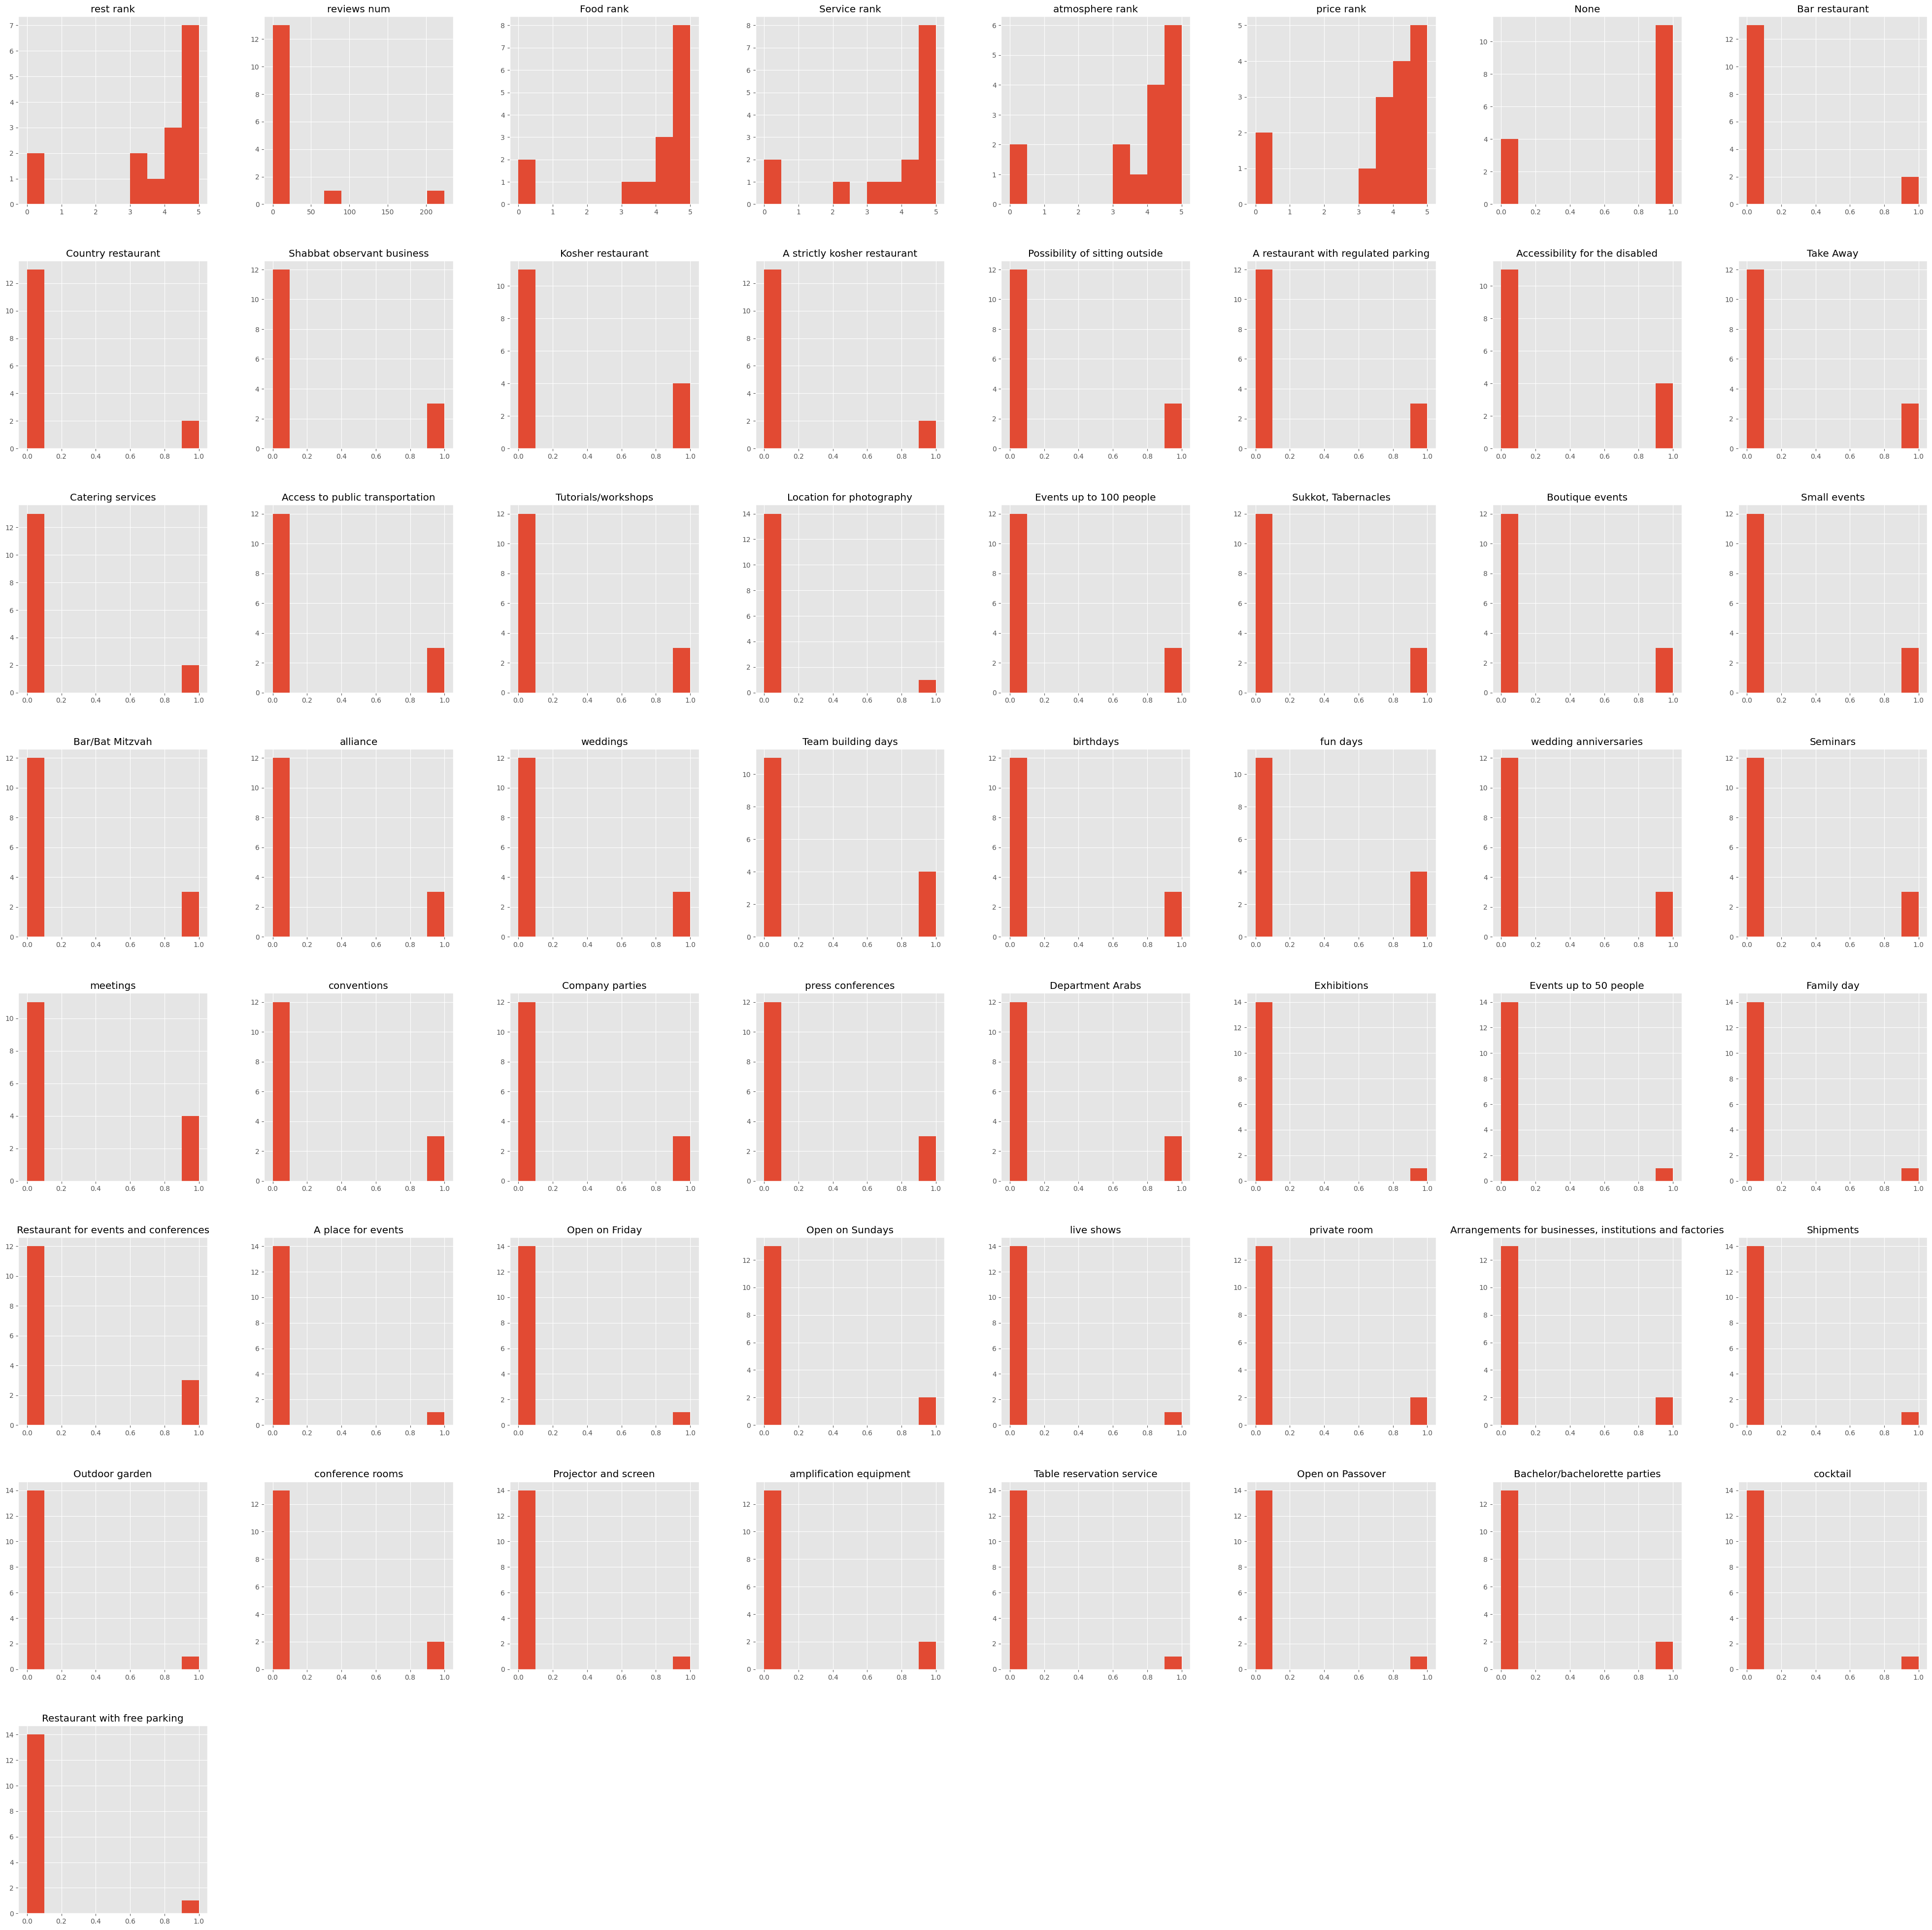

In [30]:
df2 = df.drop("rest name", axis=1)
rank_counts = df['rest name'].value_counts()
df2.hist(figsize=(50, 50))  # Set the figure size
plt.bar(rank_counts.index, rank_counts.values)  # Create the bar chart
plt.xlabel('Restaurant Rank')  # Set the x-axis label
plt.ylabel('Number of Restaurants')  # Set the y-axis label
plt.title('Distribution of Restaurant Ranks')  # Set the title
plt.show()  # Display the plot

<Axes: ylabel='count'>

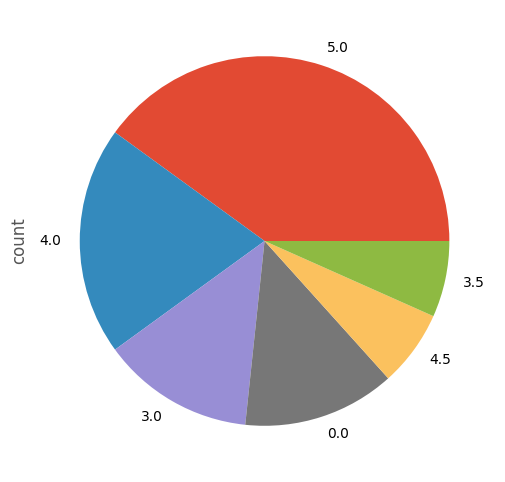

In [31]:
df['rest rank'].value_counts().plot(kind='pie')

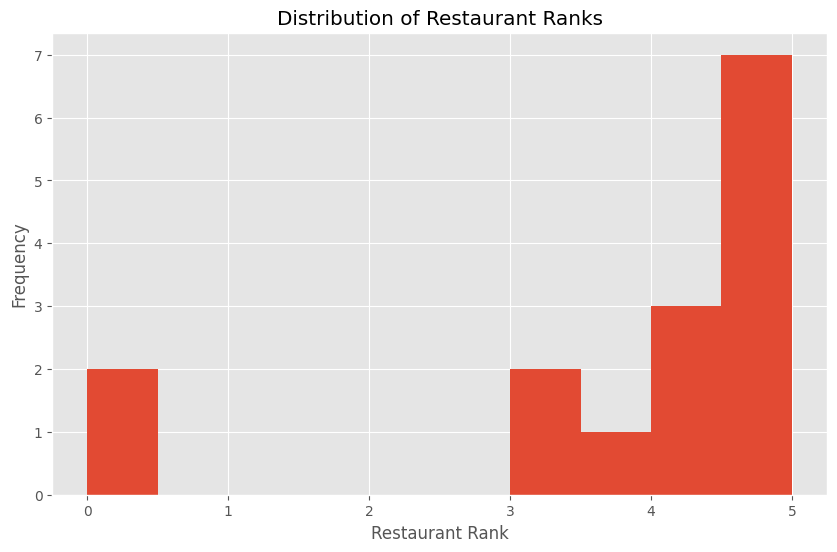

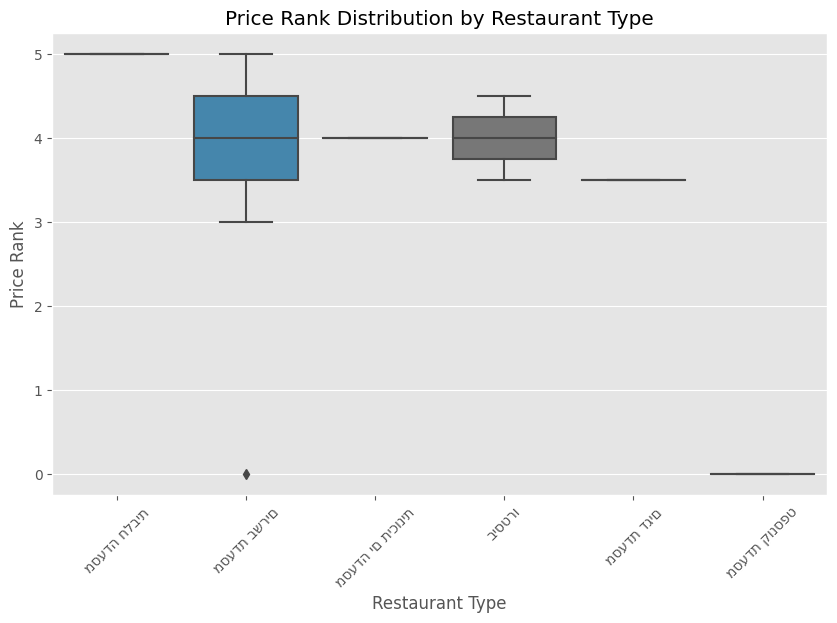

AttributeError: 'Index' object has no attribute 'text'

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the restaurant dataset into a Pandas DataFrame
df = pd.read_csv('Pull_Data.csv')

# Basic Statistics
mean_rest_rank = df['rest rank'].mean()
median_reviews_num = df['reviews num'].median()
mode_rest_type = df['rest type'].mode()[0]

# Distribution Analysis
plt.hist(df['rest rank'], bins=10)
plt.xlabel('Restaurant Rank')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ranks')
plt.show()

sns.boxplot(x='rest type', y='price rank', data=df)
plt.xlabel('Restaurant Type')
plt.ylabel('Price Rank')
plt.title('Price Rank Distribution by Restaurant Type')
plt.xticks(rotation=45)
plt.show()

plt.bar(df['rest type'].value_counts().index, df['rest type'].value_counts().values)
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Count of Restaurants by Type')
plt.xticks(rotation=45)
plt.show()

# Relationships and Correlations
plt.scatter(df['price rank'], df['rest rank'])
plt.xlabel('Price Rank')
plt.ylabel('Restaurant Rank')
plt.title('Relationship between Price Rank and Restaurant Rank')
plt.show()

corr_matrix = df[['rest rank', 'Food rank', 'Service rank', 'atmosphere rank', 'price rank']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Time-based Analysis (assuming you have a date or timestamp column)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

monthly_avg_rest_rank = df.groupby('month')['rest rank'].mean()
monthly_avg_rest_rank.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Average Restaurant Rank')
plt.title('Average Restaurant Rank by Month')
plt.xticks(range(1, 13))
plt.show()

# Text Analysis (assuming you have a 'review' column)
from textblob import TextBlob
df['review_sentiment'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['review_sentiment'].hist()
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Reviews')
plt.show()

word_cloud_text = ' '.join(df['review'])
from wordcloud import WordCloud
wordcloud = WordCloud().generate(word_cloud_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
